In [1]:
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from pycm import ConfusionMatrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import numpy as np

/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(


In [2]:
import os
import pandas as pd

# Path to the directory containing your CSV files
directory_path = '/home/danish/Datasets/ICS/triple'
# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file and concatenate its data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path).dropna()
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Display the combined DataFrame
data = combined_df # .sample(frac=0.5, random_state=42)
data.shape
# Optionally, you can save the combined DataFrame to a new CSV file
# combined_df.to_csv('/path/to/combined_data.csv', index=False)

(78377, 129)

In [3]:
# List of bad or constant columns 
columns_to_drop = ['R3-PA:Z', 'R1-PA:Z', 'R2-PA:Z', 'R4-PA:Z', 'snort_log1', 'snort_log2', 'control_panel_log2', 'control_panel_log1']

# Remove specified columns
data = data.drop(columns=columns_to_drop)

In [4]:


# # Load your CSV file into a DataFrame
# csv_file = 'path_to_your_csv_file.csv'
# df = pd.read_csv(csv_file)

# # Assuming 'target' is your target column name
# target_column = 'target'

# # Split the data into features (X) and target (y)
# X = df.drop(columns=[target_column])
# y = df[target_column]

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize TPOT Classifier
# tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# # Search for the best pipeline
# tpot.fit(X_train, y_train)

# # Evaluate the best pipeline on the test set
# accuracy = tpot.score(X_test, y_test)
# print(f"Test accuracy: {accuracy}")

# # Make predictions
# y_pred = tpot.predict(X_test)

# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

# # Calculate and print PyCM metrics
# pycm_obj = ConfusionMatrix(actual_vector=list(y_test), predict_vector=list(y_pred))
# print(pycm_obj)

# # Get detailed PyCM report
# pycm_report = pycm_obj.overall_stat
# print(pycm_report)


In [5]:

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('/home/danish/Downloads/Datasets/ICS/binaryAllNaturalPlusNormalVsAttacks/data1.csv')
data.replace([np.inf, -np.inf], 1e15, inplace=True)
# data

# Extract the numerical columns for normalization
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols]
data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4:S,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log3,snort_log4,marker
0,129.047284,133139.0637,9.069922,133113.9904,-110.907440,133214.2835,129.522839,477.18466,4.262806,509.59513,...,0.0,0,0,0,0,0,0,0,0,NoEvents
1,128.949881,133063.8439,8.978249,133013.6974,-111.016302,133088.9172,129.368141,477.91710,4.125296,510.32757,...,0.0,0,0,0,0,0,0,0,0,NoEvents
2,128.222225,132336.7191,8.262051,132286.5725,-111.749688,132386.8656,128.382653,482.12863,3.265859,512.70800,...,0.0,0,0,0,0,0,0,0,0,NoEvents
3,123.850557,129202.5603,3.867465,129152.4138,-116.132816,129277.7801,121.965526,505.74982,-1.249048,525.52570,...,0.0,0,0,0,0,0,0,0,0,NoEvents
4,128.594648,132236.4260,8.623015,132186.2794,-111.354348,132261.4993,132.364710,276.86232,8.829280,289.13069,...,0.0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,35.603597,132286.5725,-84.373765,132236.4260,155.626796,132361.7923,39.998184,249.76204,-81.073528,251.77625,...,0.0,0,0,0,0,0,0,0,0,Natural
78373,35.374414,132336.7191,-84.602948,132286.5725,155.397613,132411.9389,38.462657,253.60735,-82.081934,253.79046,...,0.0,0,0,0,0,0,0,0,0,Natural
78374,35.368685,132336.7191,-84.608678,132286.5725,155.391884,132411.9389,38.508493,253.60735,-82.139230,254.15668,...,0.0,0,0,0,0,0,0,0,0,Natural
78375,35.305659,132336.7191,-84.665973,132286.5725,155.334588,132411.9389,38.244933,253.60735,-82.374142,254.33979,...,0.0,0,0,0,0,0,0,0,0,Natural


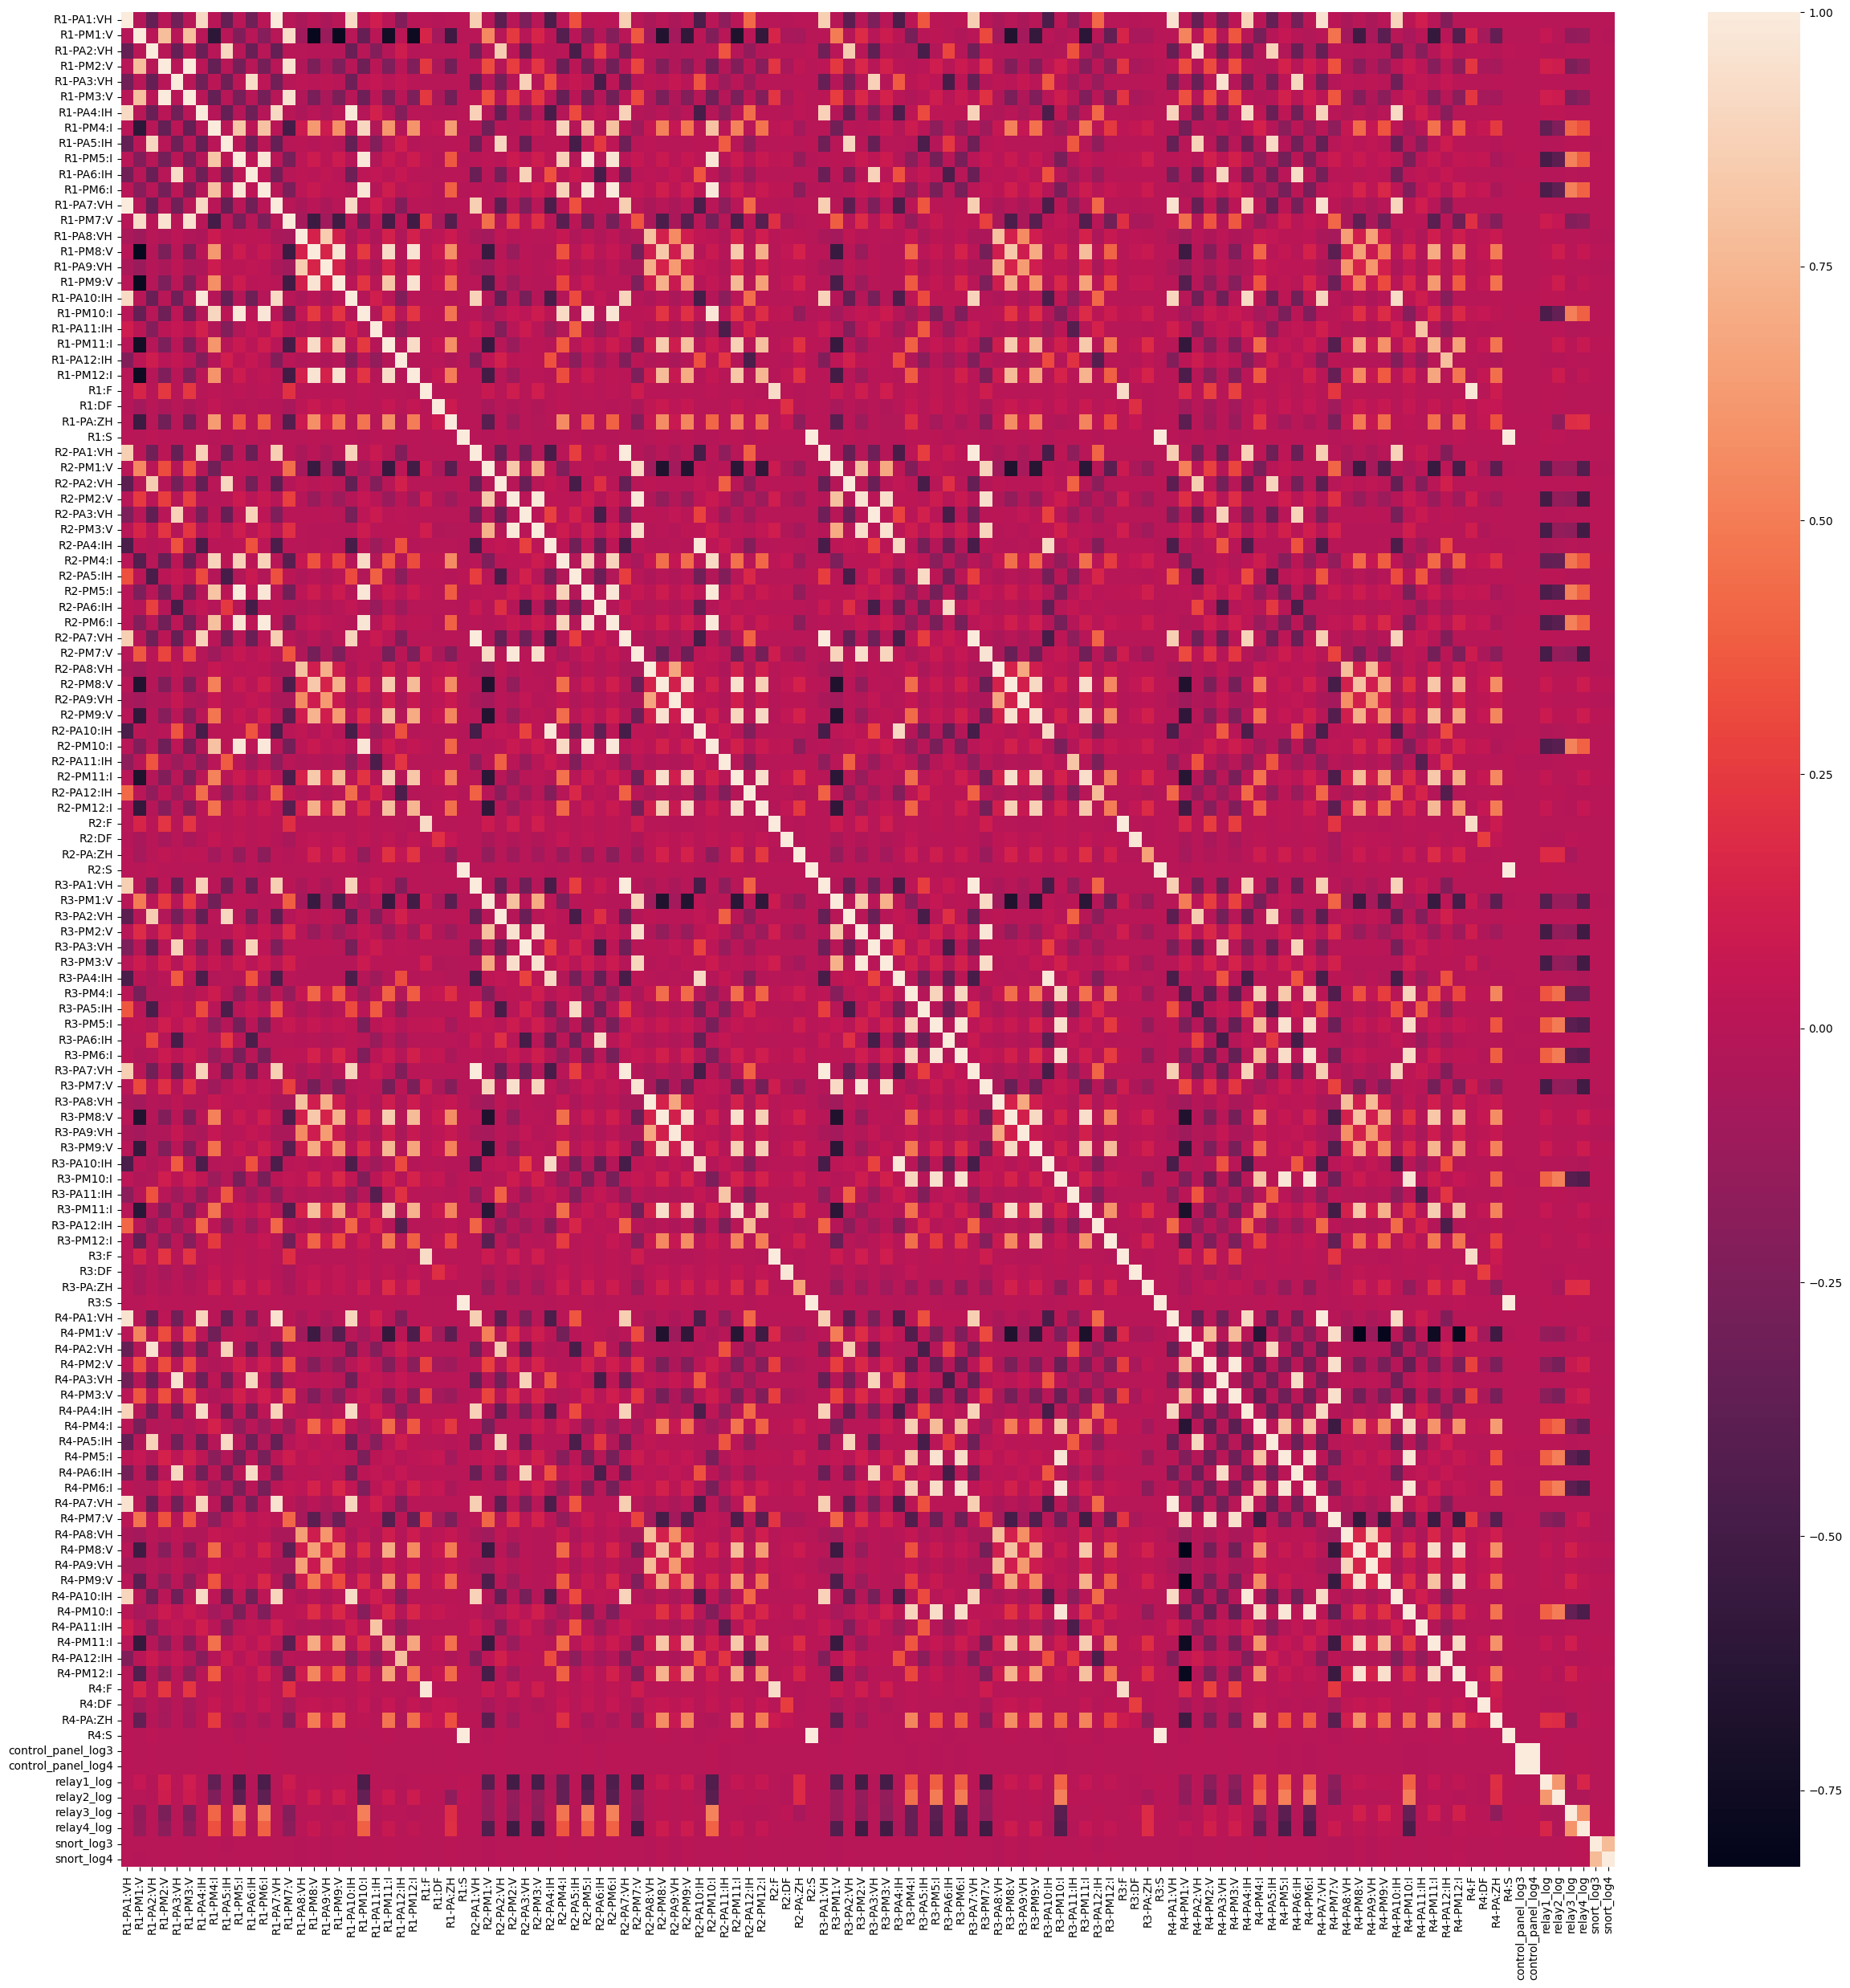

In [6]:

corr = pd.DataFrame(data.drop('marker', axis=1)).corr()

plt.figure(figsize=(30,30))

sns.heatmap(corr)

plt.show()

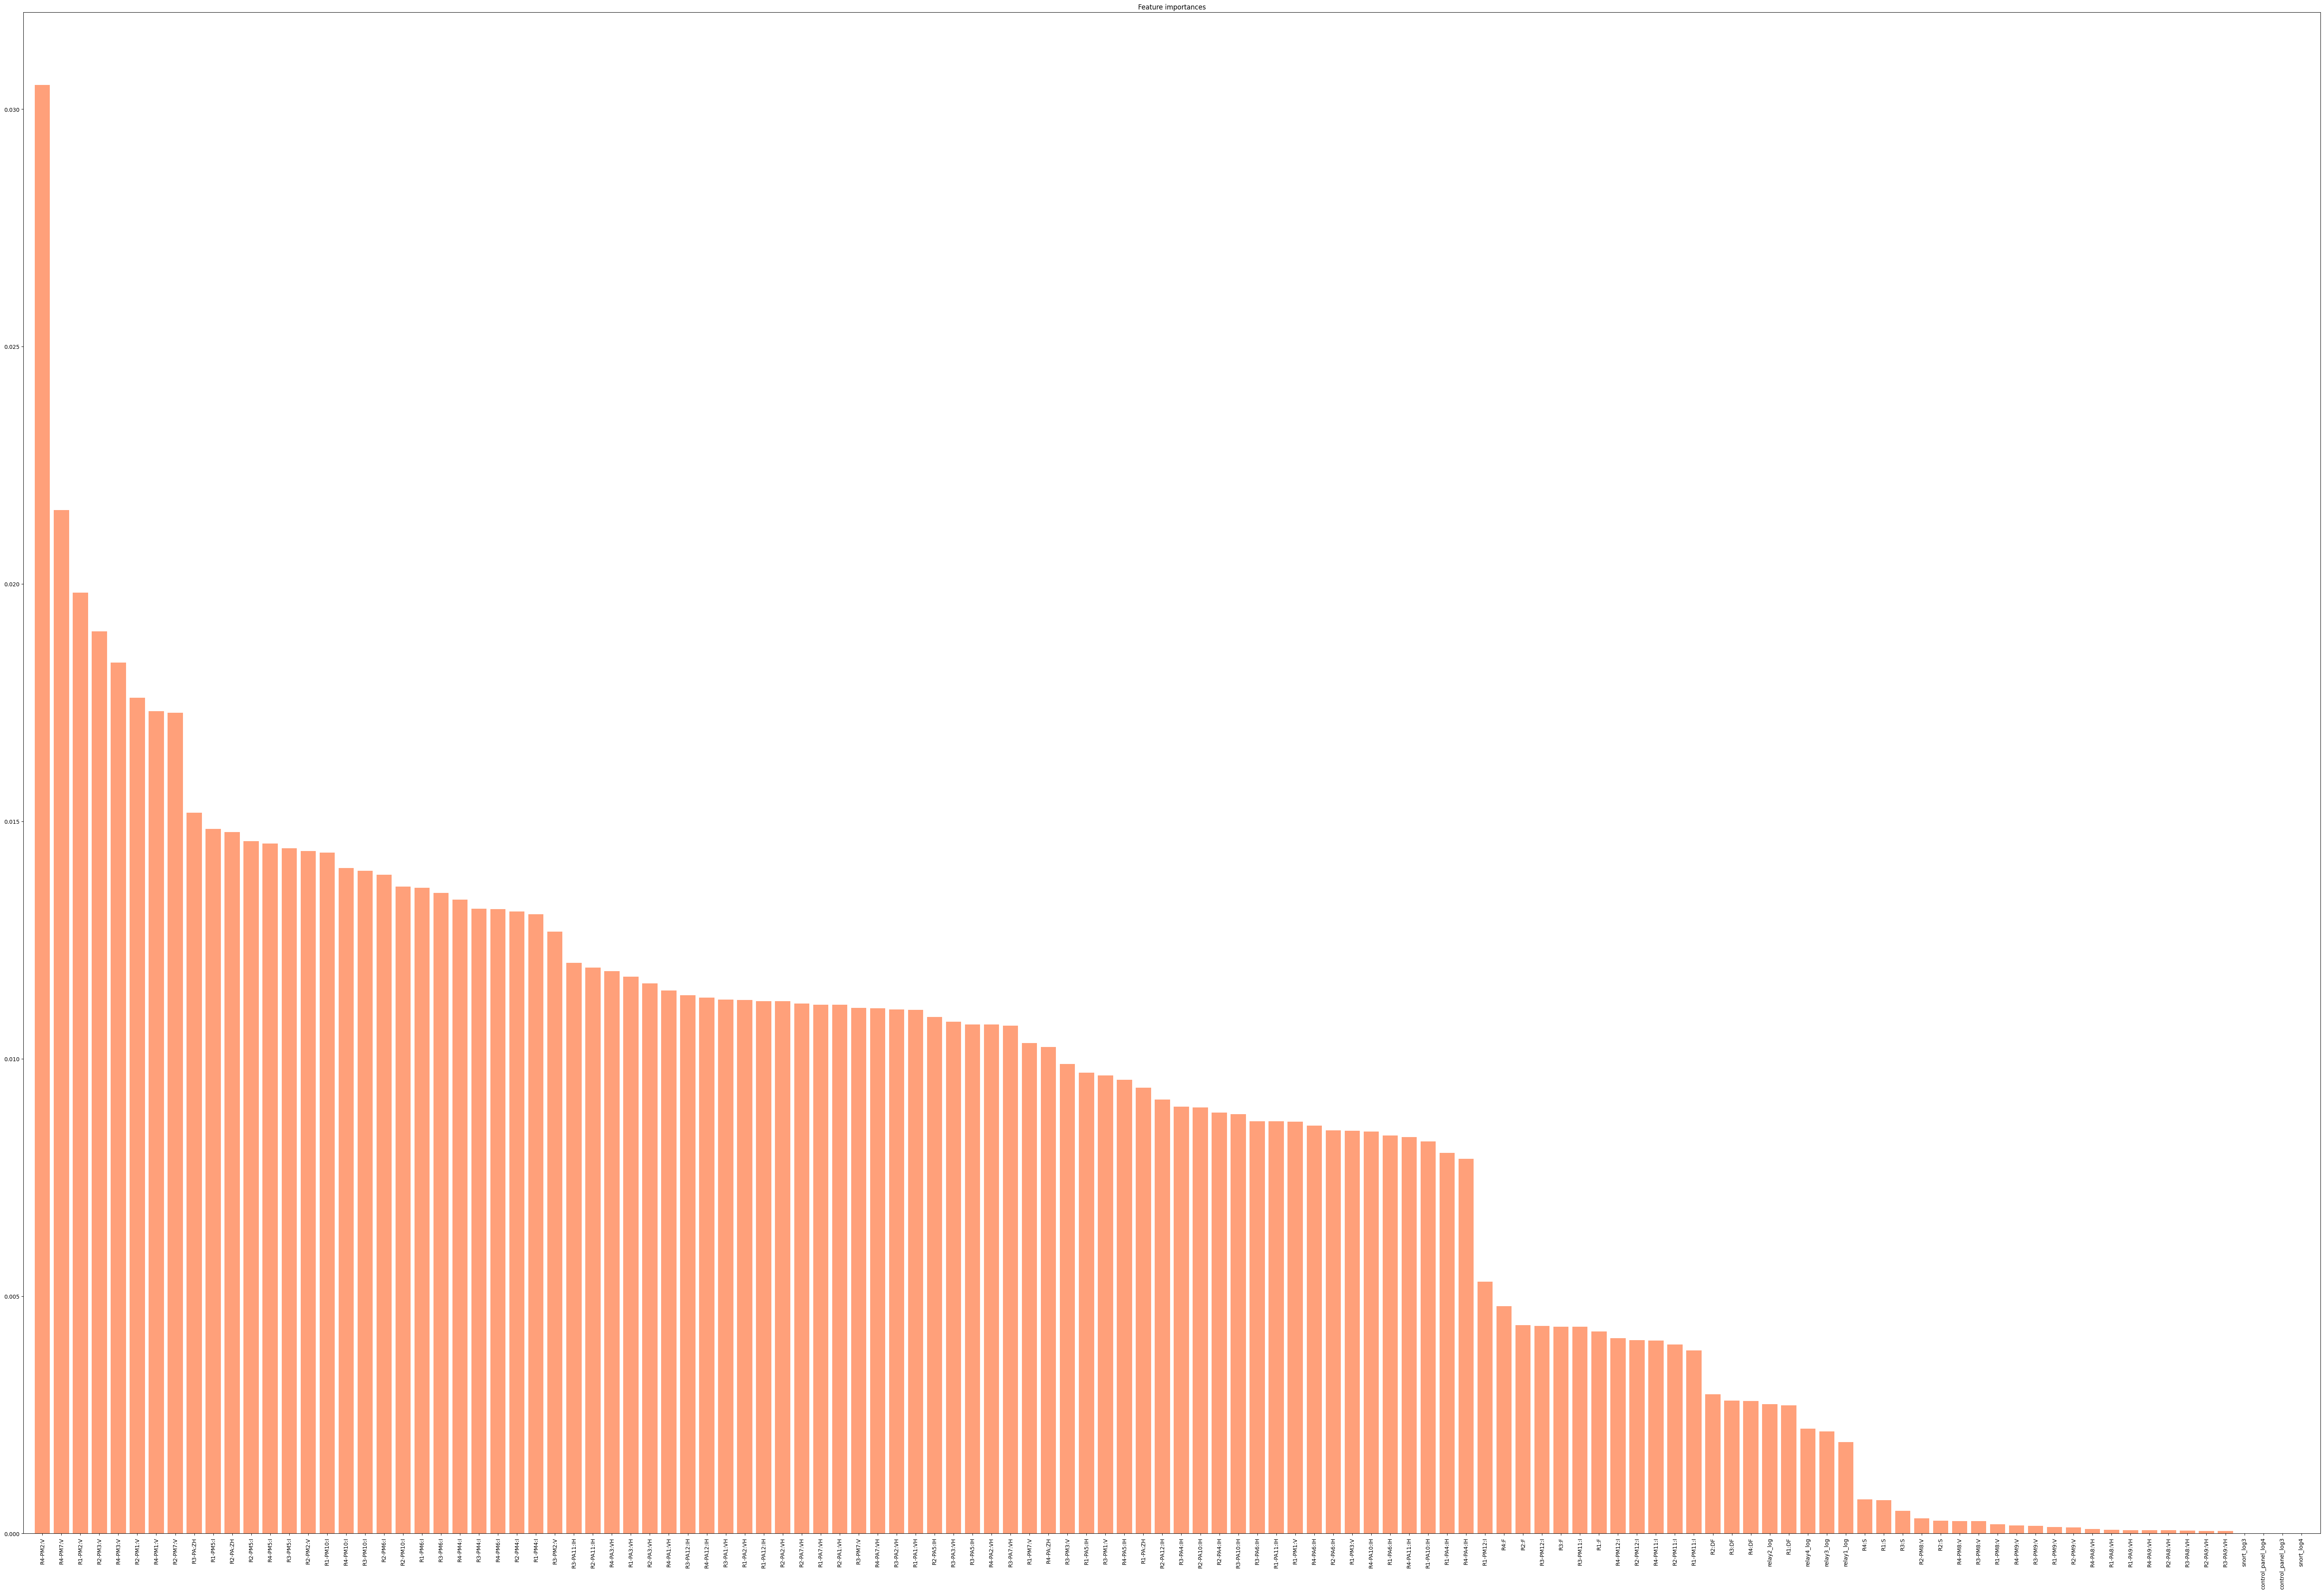

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(data.drop('marker', axis=1), data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(data.drop('marker', axis=1).shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(data.drop('marker', axis=1).shape[1]), data.drop('marker', axis=1).columns[indices], rotation=90)
plt.xlim([-1, data.drop('marker', axis=1).shape[1]])
plt.show()

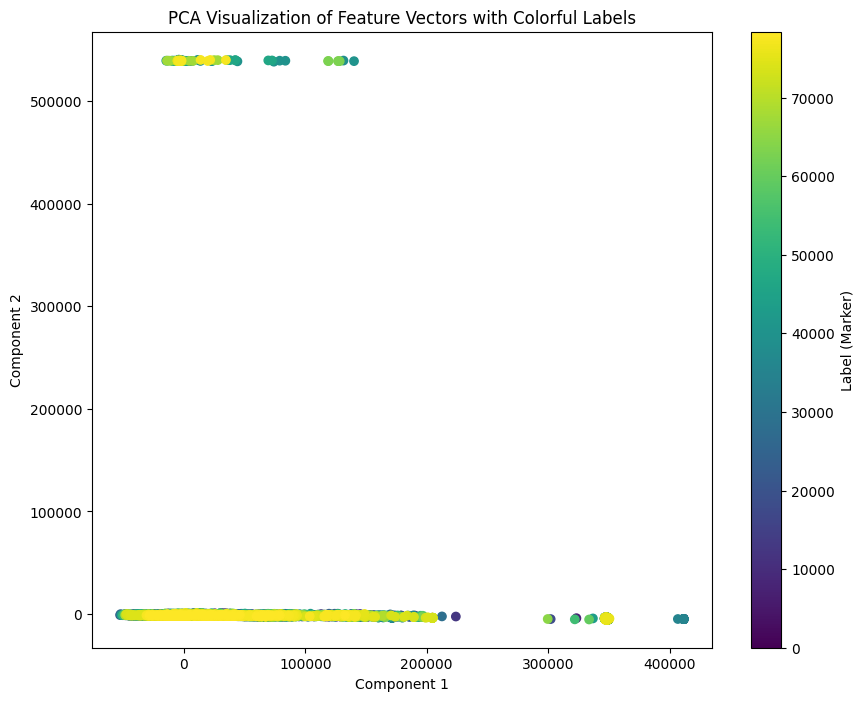

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


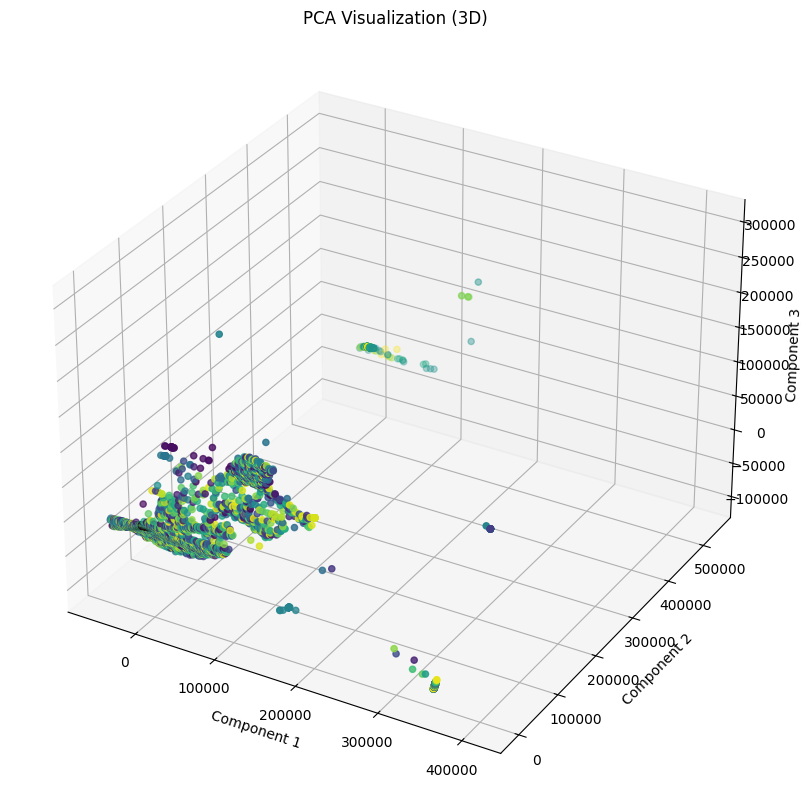

In [9]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [10]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)

# sfm = SelectFromModel(rf, threshold=0.00025)
sfm = SelectFromModel(et)
sfm.fit(data.drop('marker', axis=1), data['marker'].tolist())
# X_important_train = sfm.transform(X_train)
# X_important_test = sfm.transform(X_test)

feature_vector_1 = sfm.transform(data.drop('marker', axis=1))

# rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
# rf.fit(X_important_train, y_train)
# y_pred = rf.predict(X_important_test)
# print(classification_report(y_test, y_pred))
print(feature_vector_1.shape)




(78377, 73)


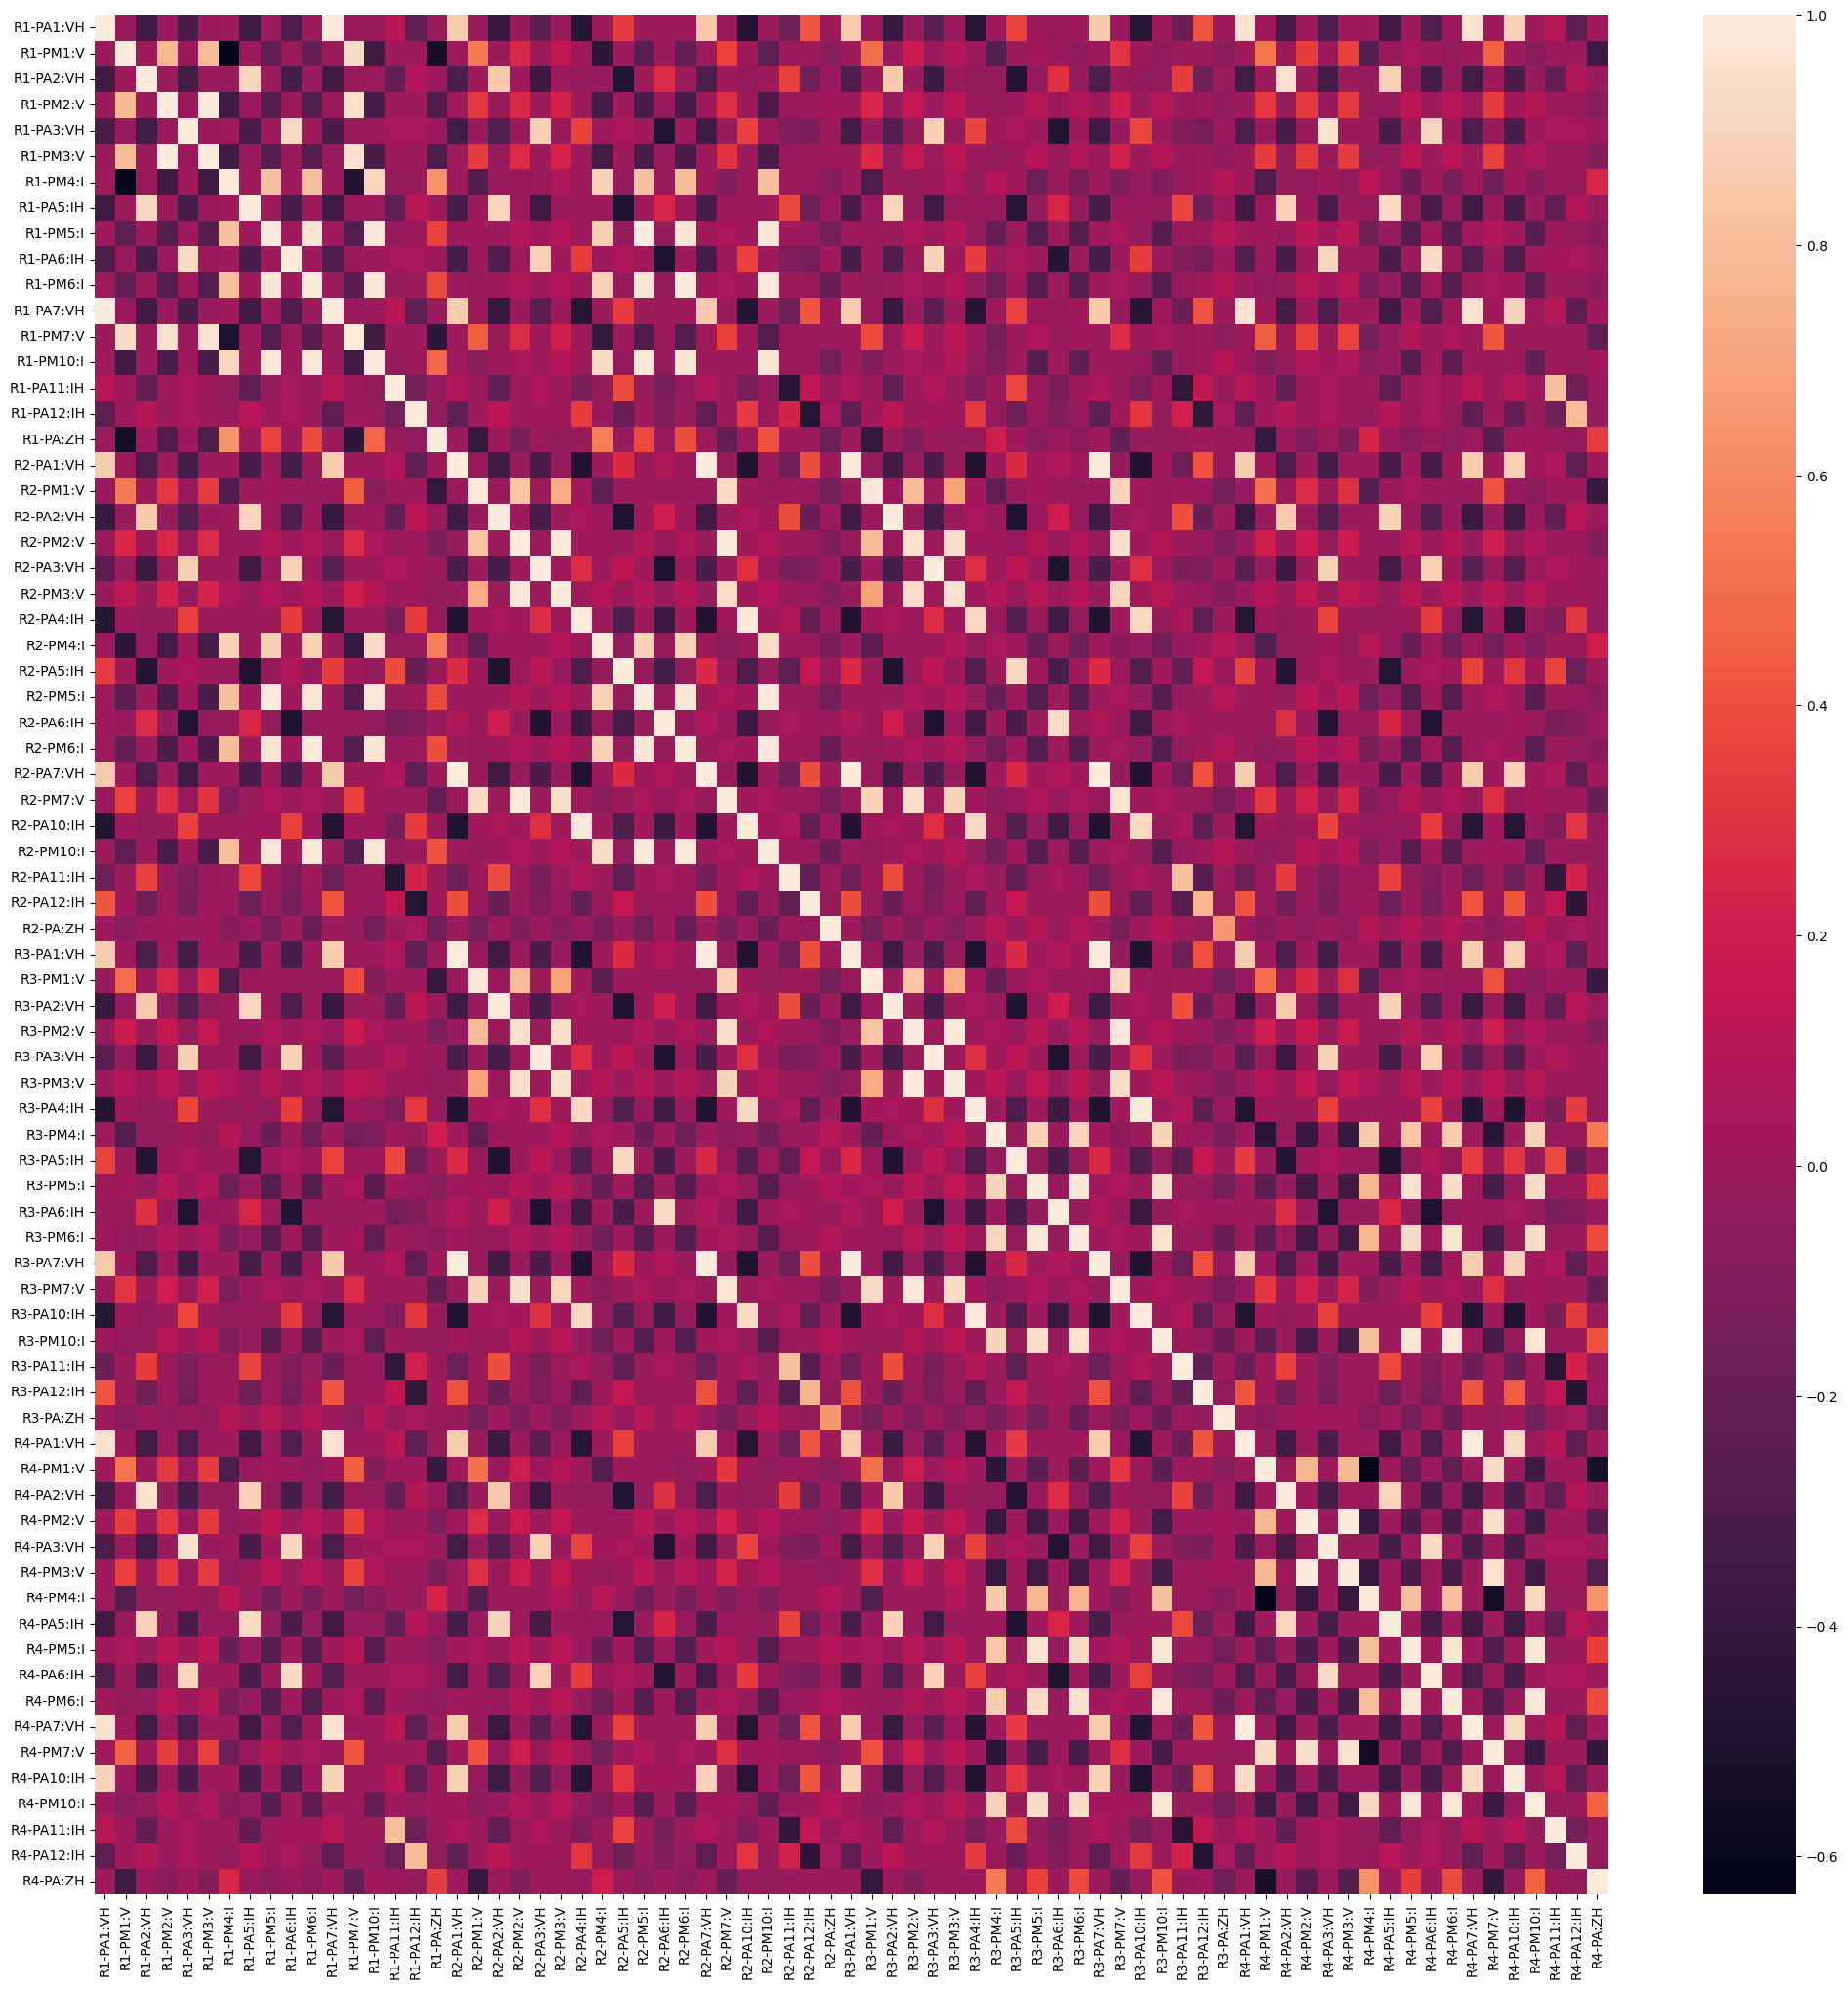

In [11]:
cols = sfm.get_feature_names_out()
feature_vector_1 =pd.DataFrame(feature_vector_1)
feature_vector_1.columns = cols
feature_vector_1



corr = pd.DataFrame(feature_vector_1).corr()

plt.figure(figsize=(25,25))

sns.heatmap(corr)

plt.show()

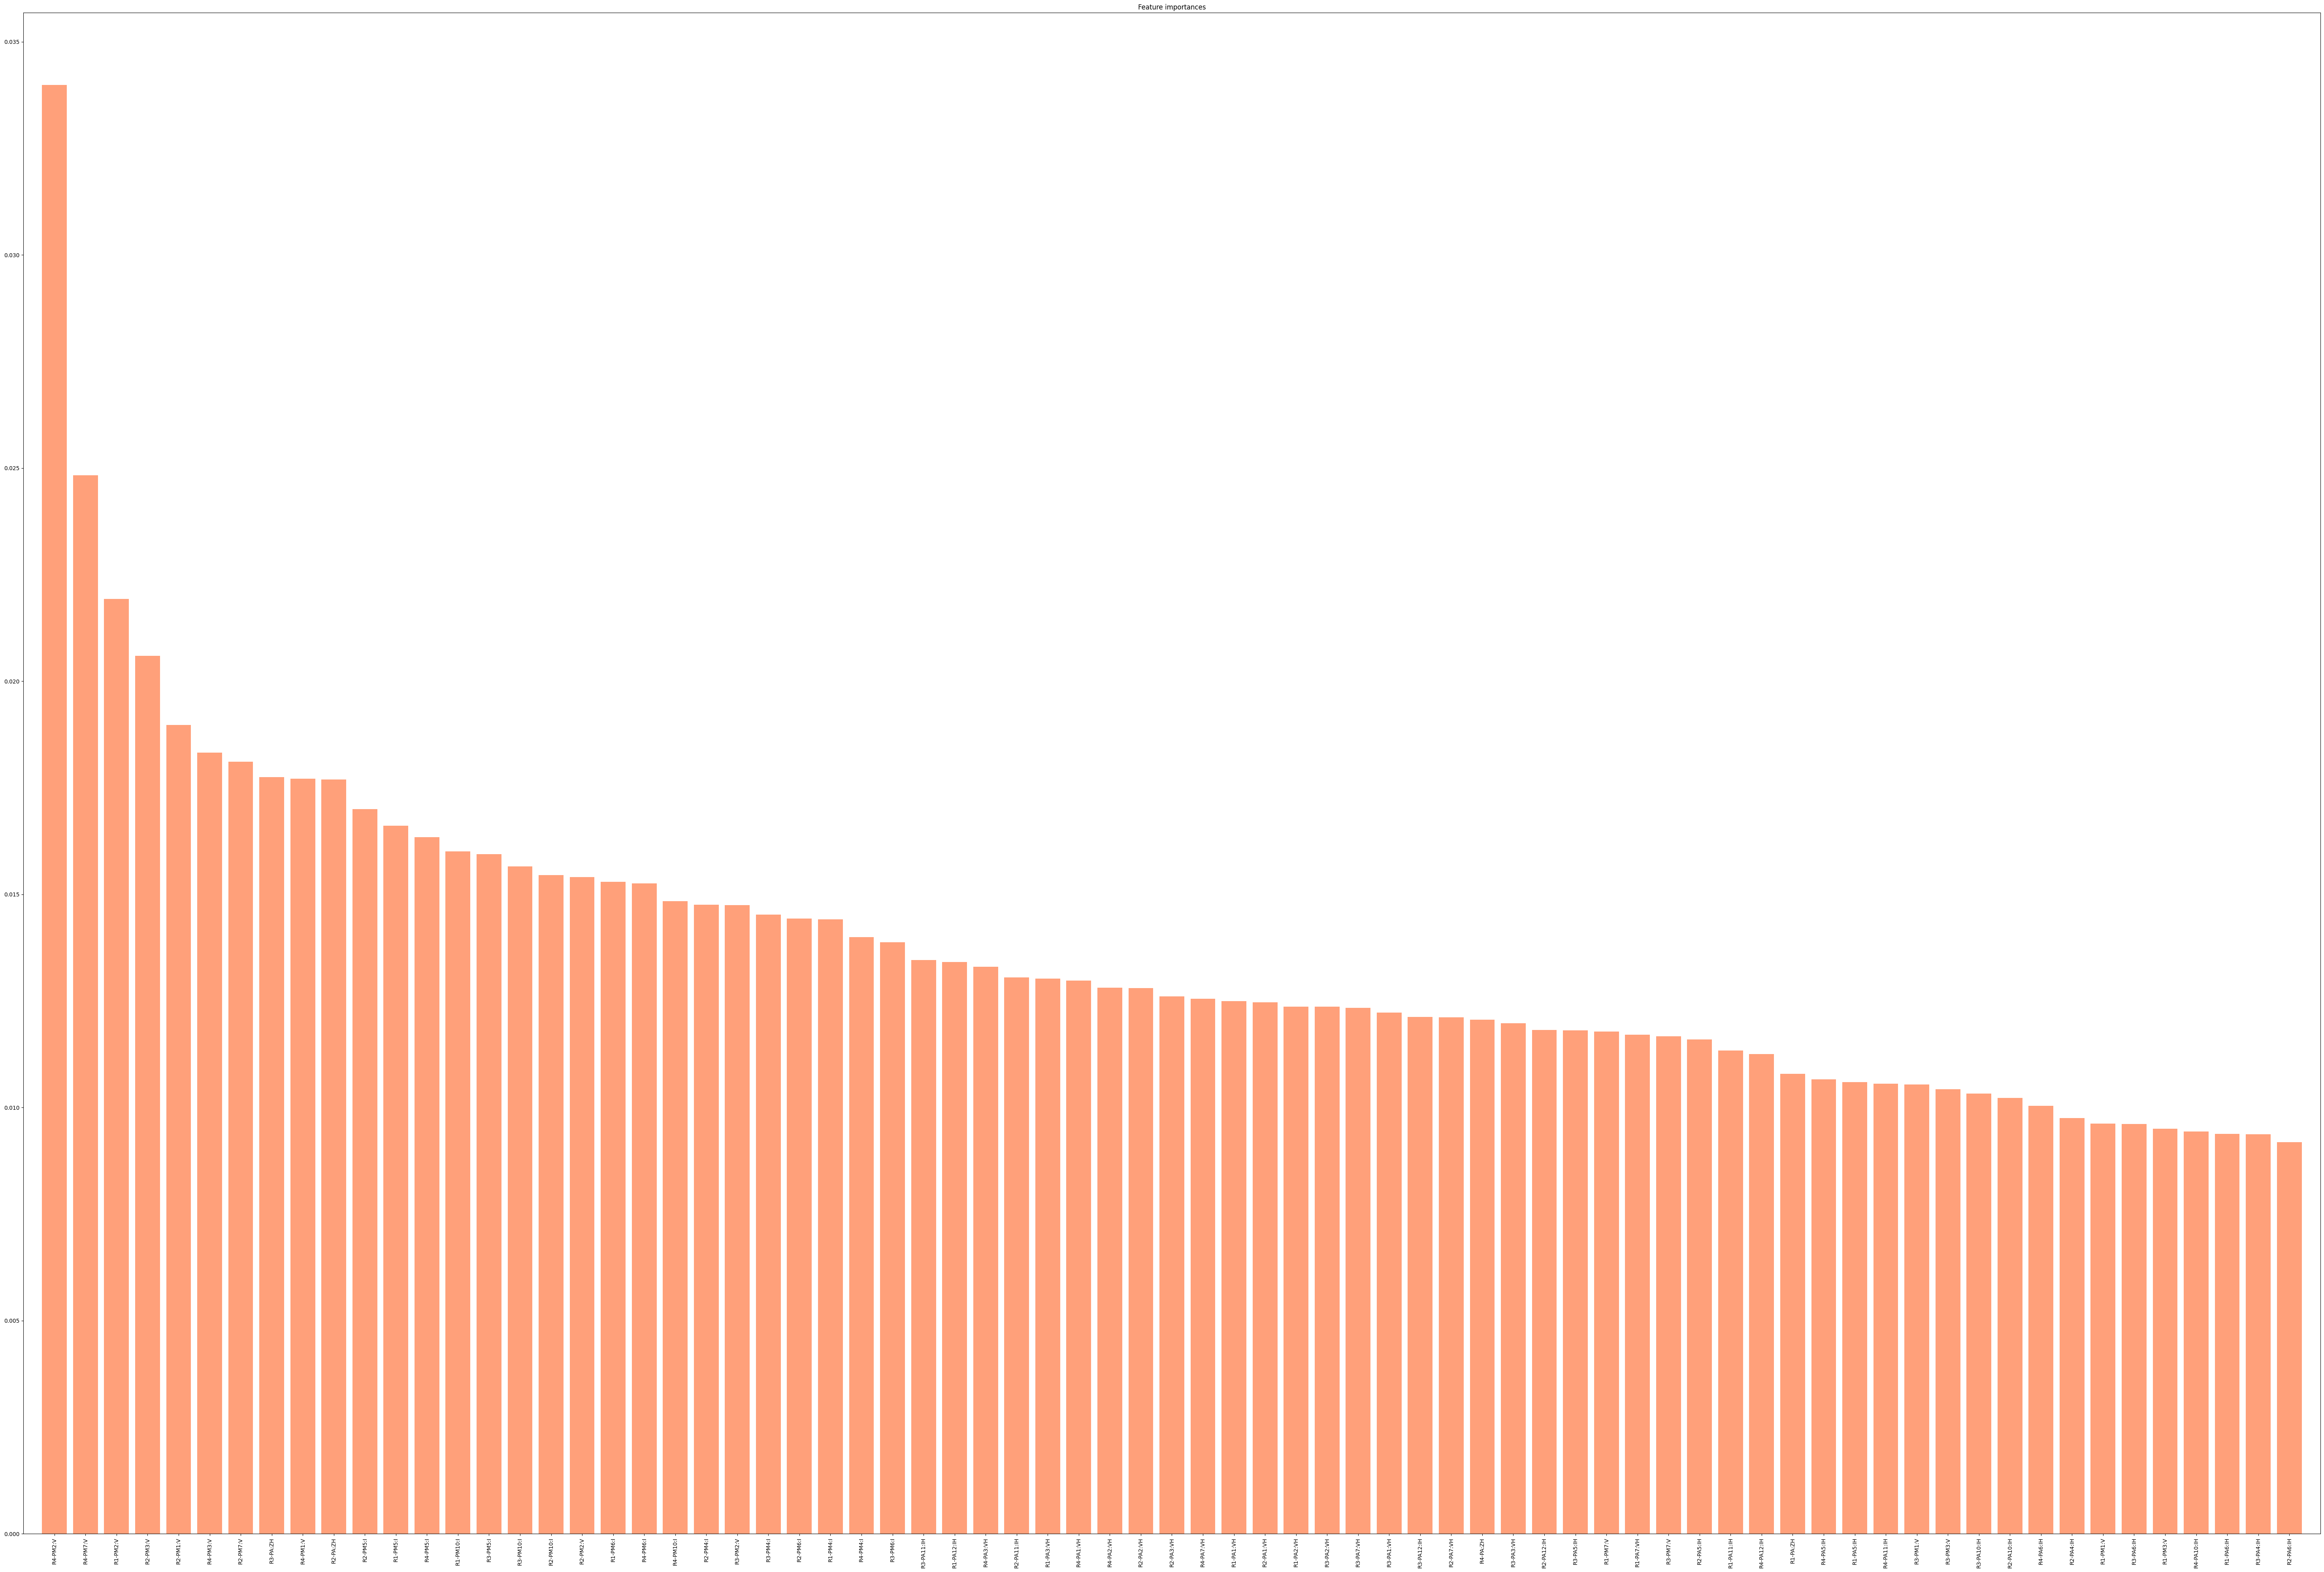

In [12]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(feature_vector_1, data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(feature_vector_1.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(feature_vector_1.shape[1]), feature_vector_1.columns[indices], rotation=90)
plt.xlim([-1, feature_vector_1.shape[1]])
plt.show()

In [13]:
numerical_cols = feature_vector_1.select_dtypes(include=['float64', 'int64']).columns


scaler = RobustScaler()

# Normalize the numerical columns
feature_vector_1[numerical_cols] = scaler.fit_transform(feature_vector_1[numerical_cols])
feature_vector_1
# # Display the normalized DataFrame
# print(data)


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,...,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PA12:IH,R4-PA:ZH
0,0.937098,1.288889,0.004594,1.521739,-0.803109,1.288889,0.652913,0.012042,0.850801,-0.785585,...,0.847531,-0.783123,0.638573,0.937857,0.944305,0.921097,0.705841,-173.170764,-5.144086,-0.476957
1,0.936520,1.222222,0.004151,1.434783,-0.803813,1.177778,0.657767,0.011345,0.855734,-0.786550,...,0.853717,-0.784197,0.641020,0.937279,0.860367,0.920260,0.709525,-172.987417,-5.103226,-0.458196
2,0.932202,0.577778,0.000692,0.804348,-0.808551,0.555555,0.685680,0.006993,0.871763,-0.793349,...,0.872276,-0.790412,0.664263,0.932956,0.251815,0.914609,0.731631,-174.895367,-5.288889,-0.419051
3,0.906260,-2.200000,-0.020535,-1.913043,-0.836868,-2.200000,0.842233,-0.015872,0.958076,-0.837537,...,0.947750,-0.834571,0.824518,0.906849,-2.350271,0.879203,0.863039,177.210116,-5.934050,0.096545
4,0.934412,0.488889,0.002435,0.717391,-0.805997,0.444444,-0.674757,0.035167,-0.633785,-0.762177,...,-0.649568,-0.759912,-0.698516,0.935066,0.146892,0.943700,-0.683149,178.722725,-4.169176,-1.033886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,0.382578,0.533333,-0.446766,0.760870,0.918860,0.533333,-0.854369,-0.420120,-0.885327,1.015412,...,-0.878463,1.006485,-0.803722,0.382773,0.272799,0.377285,-0.850171,-154.543906,14.048746,-1.248345
78373,0.381218,0.577778,-0.447873,0.804348,0.917379,0.577778,-0.828883,-0.425226,-0.871763,1.010931,...,-0.869802,1.004145,-0.801275,0.381343,0.272799,0.372506,-0.841575,0.000000,0.000000,-0.954221
78374,0.381184,0.577778,-0.447901,0.804348,0.917342,0.577778,-0.828883,-0.425516,-0.869297,1.010815,...,-0.867327,1.003838,-0.801275,0.381309,0.272799,0.372576,-0.840346,0.000000,0.000000,-0.932723
78375,0.380810,0.577778,-0.448178,0.804348,0.916972,0.577778,-0.828883,-0.426706,-0.868064,1.009695,...,-0.866090,1.003339,-0.797605,0.380969,0.272799,0.371808,-0.839118,0.000000,0.000000,-0.894856


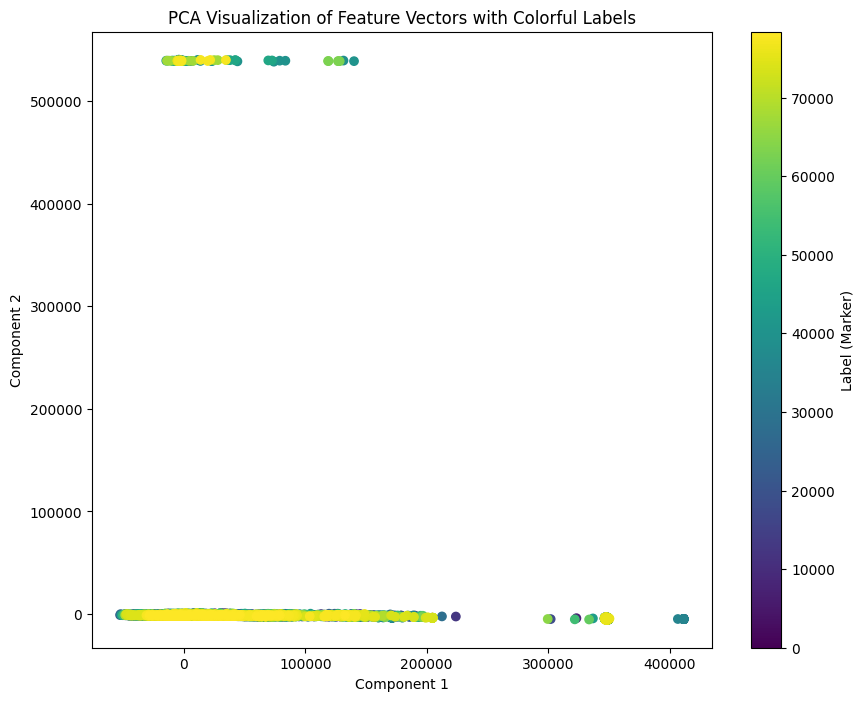

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


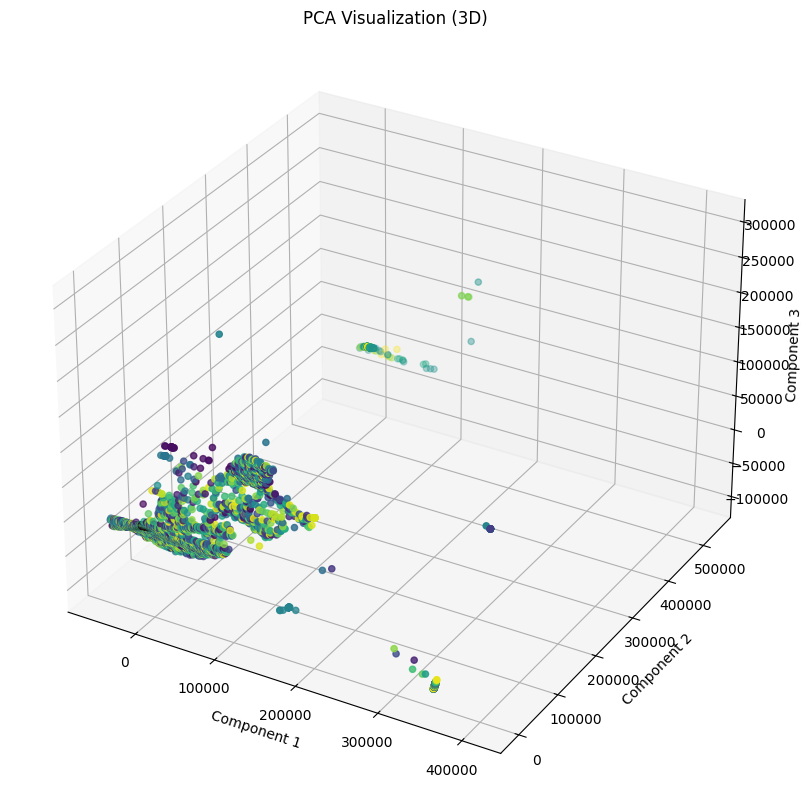

In [15]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Assuming the target variable is in a column named 'target'
# X = data.drop('marker', axis=1)
X = feature_vector_1
y = data['marker']
# y.value_counts()
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([2, 2, 2, ..., 1, 1, 1])

In [17]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:

# # Initialize TPOT Classifier
# tpot = TPOTClassifier(generations=5, population_size=20, cv=5,
#                                     random_state=42, verbosity=2)
# # tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)


In [19]:

# # Search for the best pipeline
# tpot.fit(X_train, y_train)


In [22]:
import joblib
# # Save the trained TPOT model to a file
# model_file = '/home/danish/Codes/AutoML/TPOT/Model_Trained_Dataset_1/tpot_trained_model.joblib'
# joblib.dump(tpot.fitted_pipeline_, model_file)
# print(f"Trained TPOT model saved to {model_file}")


# Load the saved TPOT model from file
model_file = '/home/danish/Codes/AutoML/TPOT/Model_Trained_Dataset_2/tpot_trained_model.joblib'
tpot = joblib.load(model_file)
print(f"Trained TPOT model loaded from {model_file}")

# Now you can use the loaded model for prediction tasks
# Example: Make predictions using the loaded model
# Assuming 'X_test' is your test data
y_pred = tpot.predict(X_test)

Trained TPOT model loaded from /home/danish/Codes/AutoML/TPOT/Model_Trained_Dataset_2/tpot_trained_model.joblib


In [23]:

# Evaluate the best pipeline on the test set
accuracy = tpot.score(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Make predictions
y_pred = tpot.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

Test accuracy: 0.9364633835162031


array([[10939,   223,    12],
       [  709,  2920,     2],
       [   45,     5,   821]])

In [24]:
from pycm import ConfusionMatrix

# Calculate and print PyCM metrics
pycm_obj = ConfusionMatrix(actual_vector=list(y_test), predict_vector=list(y_pred))
print(pycm_obj)

# Get detailed PyCM report
pycm_report = pycm_obj.overall_stat
print(pycm_report)

Predict     0           1           2           
Actual
0           10939       223         12          

1           709         2920        2           

2           45          5           821         





Overall Statistics : 

95% CI                                                            (0.93264,0.94028)
ACC Macro                                                         0.95764
ARI                                                               0.7719
AUNP                                                              0.90632
AUNU                                                              0.92307
Bangdiwala B                                                      0.9023
Bennett S                                                         0.9047
CBA                                                               0.8941
CSI                                                               0.85736
Chi-Squared                                                       25113.77401
Chi-Squared DF   